The following is from [this article](https://medium.com/towards-data-science/understanding-predictive-maintenance-unit-roots-and-stationarity-f05322f7b6df) in Medium.

# Key Rules of Stationarity

1. **Constant Mean:** A stationary time series should exhibit a consistent average value over time. If the mean changes, it suggests a shift in the underlying behavior of the process.

2. **Constant Variance:** The variance of the time series, representing the spread of data points, should remain constant. Fluctuations in variance can make it challenging to make accurate predictions.

3. **Constant Autocorrelation:** Autocorrelation measures the correlation between a time series and its lagged values. In a stationary series, the strength and pattern of autocorrelation should be consistent throughout.

Just “stability” of statistical properties.

# Augumented Dickey Fuller (ADF) helps us

The ADF test involves a bit of math, but let’s simplify it:

- Null Hypothesis (H0): This is like the default assumption. The null hypothesis for ADF is that the data has a unit root, which means it’s non-stationary. It’s like saying the ants are wandering randomly. **H0:The data has a unit root (non-stationary)**

- Alternative Hypothesis (H1): This is what we’re trying to prove. The alternative hypothesis is that the data is stationary, like the ants marching in a clear line. **H1:The data is stationary**

- Test Statistic: The ADF test calculates a number called the test statistic. If this number is very small, it suggests that the data is likely stationary. P-value: This is a probability score. If the p-value is small (less than a certain threshold, like 0.05), we reject the null hypothesis and accept the alternative, saying our data is probably stationary.

This is not very complicated, just run the tests and check P-value

In [2]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1992)  # WOW this is our deterministic seed.

In [3]:
def generate_stationary_series_pseudorandom(size=100):
    stationary_series = np.random.randn(size)
    return stationary_series

In [1]:
from statsmodels.tsa.stattools import adfuller

In [4]:
stationary_series = generate_stationary_series_pseudorandom()

In [6]:
# Perform the Augmented Dickey-Fuller (ADF) test for stationarity
(
    adf_statistic,
    adf_p_value,
    adf_lags,
    adf_nobs,
    adf_critical_values,
    adf_reg_results,
) = adfuller(stationary_series)

In [7]:
# Check if the series is stationary based on the p-value
is_stationary = adf_p_value < 0.05  # Using a significance level of 0.05
is_stationary

True

You will probably most of the time use adf like this:

In [8]:
# What youy will probably will use most of the time
_, adf_p_value, _, _, _, _ = adfuller(stationary_series)

But I will explain what is behind these variables

- `adf_statistic`: The test statistic from the ADF test, indicating the strength of evidence against the null hypothesis of non-stationarity.

- `adf_p_value`: The p-value associated with the null hypothesis. A lower p-value suggests stronger evidence against non-stationarity.

- `adf_lags`: The number of lags used in the test.

- `adf_nobs`: The number of observations used in the ADF test.

- `adf_critical_values`: The critical values for the test statistic at various significance levels.

- `adf_reg_results`: The regression results, which provide additional information about the linear regression performed during the test.

# Can we use true randomness?

Now we might feel suprised that even randomness we are affecting most of the time is the deterministic random. But can we make true randomness, ensuring that no determism is behind it?

Well, good news! We can tap into something truly physical — atmospheric noise. Remember those flickering black and white dots on your TV screen? That’s our atmospheric noise, and we’re going to harness it to whip up some genuine randomness. So, your TV’s not just for shows; it’s your ticket out of the deterministic world.

In [10]:
import requests

In [11]:
def generate_stationary_series_random(size=100):
    # Fetch truly random values from random.org atmospheric noise API
    response = requests.get(
        f"https://www.random.org/integers/?num={size}&min=-10000&max=10000&col=1&base=10&format=plain&rnd=new"
    )
    if response.status_code == 200:
        stationary_series = [int(value) for value in response.text.strip().split("\n")]
        return stationary_series
    else:
        raise Exception(
            f"Failed to fetch random values. Status code: {response.status_code}"
        )

Using this function we can genarate true randomness, Horray!

# Stationarity check

First lets generate the series.

In [13]:
# Generate series
stationary_series_pseudorandom = generate_stationary_series_pseudorandom()
stationary_series_random = generate_stationary_series_pseudorandom()

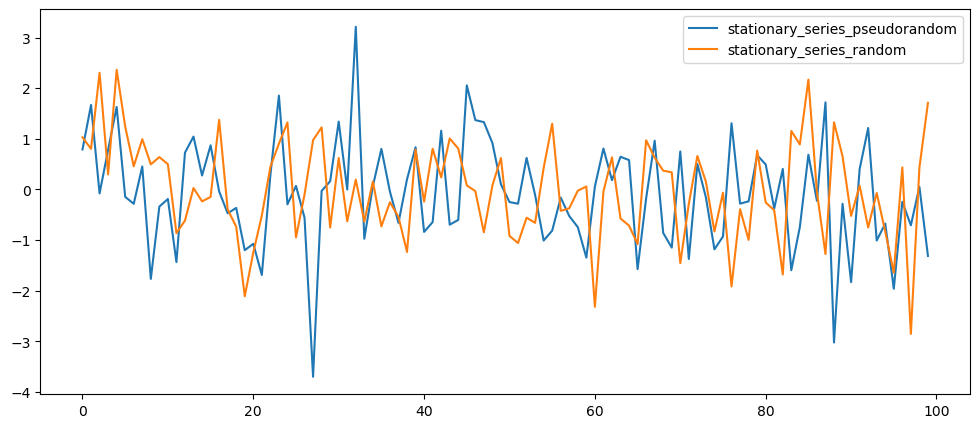

In [14]:
plt.figure(figsize=(12, 5))
plt.plot(stationary_series_pseudorandom, label="stationary_series_pseudorandom")
plt.plot(stationary_series_random, label="stationary_series_random")
plt.legend()
plt.show();

In [15]:
_, adf_p_value, _, _, _, _ = adfuller(stationary_series_pseudorandom)
print(f"PseudoRandom adf p-value: {adf_p_value}")
_, adf_p_value, _, _, _, _ = adfuller(stationary_series_random)
print(f"TrueRandom adf p-value: {adf_p_value}")

PseudoRandom adf p-value: 3.19124775189425e-16
TrueRandom adf p-value: 6.055482111347916e-13


When the p-value is very small (<0.05), it provides evidence against the null hypothesis, suggesting that your data is likely stationary.

So, in this case, with a p-value much smaller than 0.05, you have the confidence to say, “Yes, our data is stationary.”

Now, let’s take a moment to crunch the numbers. Our pseudorandom boasts a P-value approximately 2 million times smaller than the truly random one.

Why does this happen? Pseudorandom numbers are generated by algorithms, introducing a level of determinism. These algorithms can unintentionally introduce patterns or structure into the data. On the other hand, truly random data, like atmospheric noise, is more likely to exhibit the characteristics of pure randomness. The ADF test, keen on detecting patterns indicative of non-stationarity, may find less evidence of such patterns in truly random data, leading to a relatively higher P-value.

# Hand's on experience

Now we will add couple of examples how we can make this data not stationary, we are going to break our key rules of stationarity. After explanation we will plot all of them.

### Linear Trend (Non-Constant Mean)

In [16]:
def generate_non_stationary_linear_trend(size=100):
    time = np.arange(size)
    linear_trend = 0.5 * time
    non_stationary_series = np.random.randn(size) + linear_trend
    return non_stationary_series

Introducing a linear trend to violate the constant mean rule means adding a systematic increase or decrease over time. In the case of the non-stationary linear trend series, the values linearly increase over time. This violates the constant mean rule because the average value of the series is changing, indicating a shift in the underlying behavior of the process. Unit roots, in this context, contribute to the persistence of the linear trend, causing the variable’s value at any given time to be influenced by its past values.

### Sine Amplitude (Non-Constant Variance)

In [17]:
def generate_non_stationary_sin_amplitude(size=100):
    time = np.arange(size)
    amplitude = 0.5 + 0.02 * time
    sin_amplitude_component = amplitude * np.sin(2 * np.pi * time / 10)
    non_stationary_series = np.random.randn(size) + sin_amplitude_component
    return non_stationary_series

Adding a sinusoidal component with increasing amplitude violates the constant variance rule. In the non-stationary seasonal component series, the amplitude of the sinusoidal component grows linearly with time. This results in fluctuations in the spread of data points, making the variance non-constant. Unit roots contribute to the persistence of the seasonal component, influencing the variance to vary as the amplitude changes.

### Exponential Growth (Non-Constant Autocorrelation)

In [18]:
def generate_non_stationary_exponential_growth(size=100, growth_rate=0.05):
    time = np.arange(size)
    exponential_growth_component = np.exp(growth_rate * time)
    non_stationary_series = np.random.randn(size) + exponential_growth_component
    return non_stationary_series

Incorporating an exponential growth pattern violates the constant autocorrelation rule. The non-stationary expanding amplitude series exhibits exponential growth, causing the autocorrelation pattern to change with increasing values. Unit roots play a role in introducing persistence into the time series, leading to challenges in modeling and forecasting. The presence of unit roots implies non-stationarity, indicating that the variable does not revert to a constant mean over time.

### Start the experimets

In [19]:
# Example usage
stationary_series_pseudorandom = generate_stationary_series_pseudorandom()
non_stationary_linear_trend_series = generate_non_stationary_linear_trend()
non_stationary_sin_amplitude_series = generate_non_stationary_sin_amplitude()
non_stationary_exponential_growth_series = generate_non_stationary_exponential_growth()

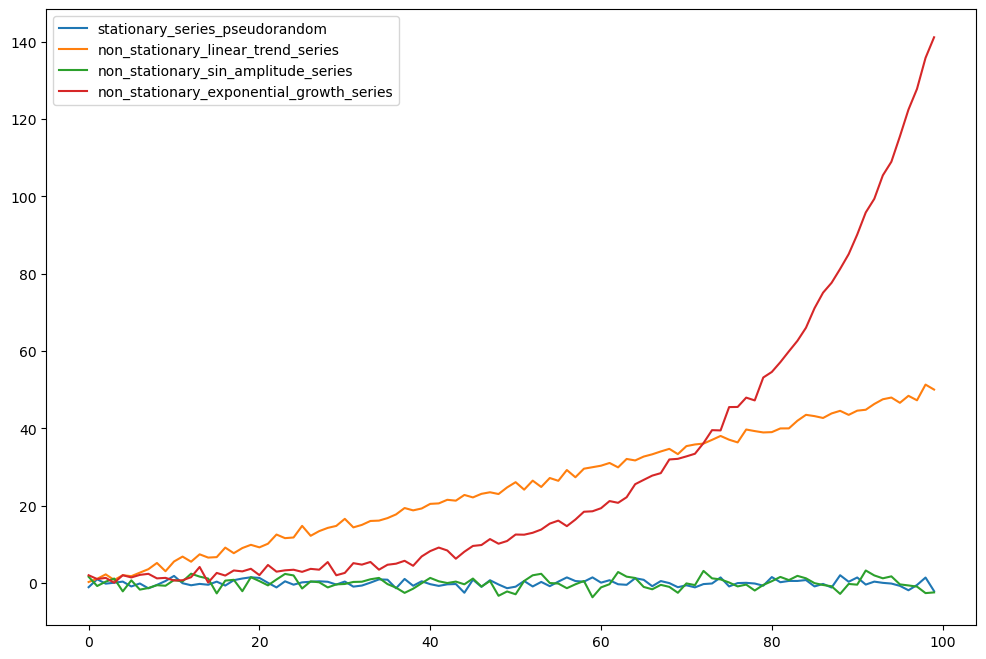

In [20]:
plt.figure(figsize=(12, 8))
plt.plot(stationary_series_pseudorandom, label="stationary_series_pseudorandom")
plt.plot(non_stationary_linear_trend_series, label="non_stationary_linear_trend_series")
plt.plot(
    non_stationary_sin_amplitude_series, label="non_stationary_sin_amplitude_series"
)
plt.plot(
    non_stationary_exponential_growth_series,
    label="non_stationary_exponential_growth_series",
)
plt.legend()
plt.show();

Spotting a linear trend or exponential growth during exploratory data analysis is relatively straightforward, as these patterns exhibit clear visual cues. However, distinguishing between stationary and non-stationary states becomes challenging when dealing with sinusoidal amplitude. Visually, it’s hard to differentiate whether the amplitude is stationary or non-stationary just by looking at the data.

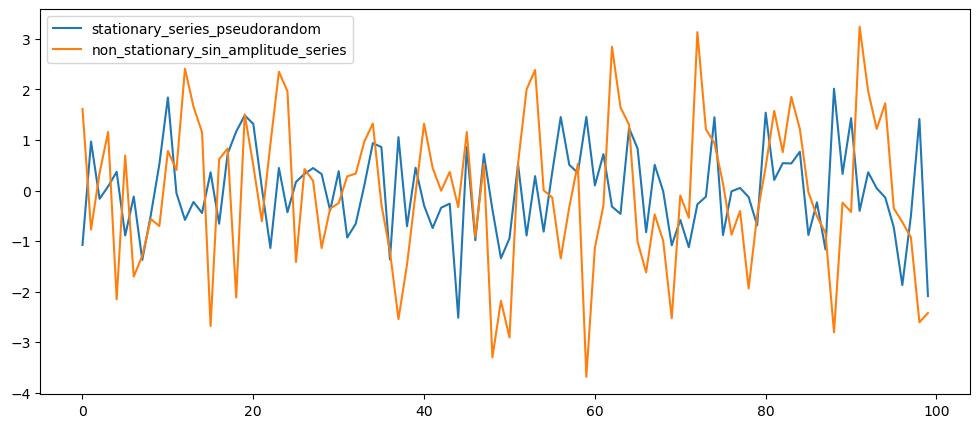

In [21]:
plt.figure(figsize=(12, 5))
plt.plot(stationary_series_pseudorandom, label="stationary_series_pseudorandom")
plt.plot(
    non_stationary_sin_amplitude_series, label="non_stationary_sin_amplitude_series"
)
plt.legend()
plt.show();

This case will show the power of statistical tests. We have powerfull tools in our hands.

In [22]:
_, adf_p_value_stationary, _, _, _, _ = adfuller(stationary_series_pseudorandom)
_, adf_p_value_linear_trend, _, _, _, _ = adfuller(
    generate_non_stationary_linear_trend()
)
_, adf_p_value_sin_amplitude, _, _, _, _ = adfuller(
    generate_non_stationary_sin_amplitude()
)
_, adf_p_value_exponential_growth, _, _, _, _ = adfuller(
    generate_non_stationary_exponential_growth()
)

# Print the results
print(f"PseudoRandom ADF P-value (Stationary Series): {adf_p_value_stationary}")
print(f"PseudoRandom ADF P-value (Linear Trend): {adf_p_value_linear_trend}")
print(f"PseudoRandom ADF P-value (Sinusoidal Amplitude): {adf_p_value_sin_amplitude}")
print(
    f"PseudoRandom ADF P-value (Exponential Growth): {adf_p_value_exponential_growth}"
)

PseudoRandom ADF P-value (Stationary Series): 0.005208575237357156
PseudoRandom ADF P-value (Linear Trend): 0.8853398825841141
PseudoRandom ADF P-value (Sinusoidal Amplitude): 0.09235202891680033
PseudoRandom ADF P-value (Exponential Growth): 1.0


The ADF test provides a clear distinction between stationary and non-stationary time series. In the first case, we can confidently reject the null hypothesis, indicating that the time series is stationary. However, for the other cases, we must accept the null hypothesis, concluding that the data is non-stationary. Specifically, in the case of sinusoidal amplitude, even though the non-stationarity is visually evident, the ADF test confirms our observation by not allowing us to reject the null hypothesis.

### Practice the transformation

Now, let’s have some fun with transformations and attempt to convert our non-stationary time series into a stationary one — like a bit of reverse engineering. In real-life scenarios, determining the exact transformation needed is often a trial-and-error process. I recommend conducting exploratory data analysis, plotting the time series, and making empirical attempts. If a transformation renders the series stationary, you not only achieve stationarity but also gain valuable insights into the characteristics of your data.

In [23]:
def make_linear_trend_stationary(series):
    # Subtract the linear trend to make the mean constant.
    time = np.arange(len(series))
    linear_trend = 0.5 * time  # Somehow we have found this trend :)
    stationary_series = series - linear_trend
    return stationary_series


def make_sin_amplitude_stationary(series):
    # Apply differencing to stabilize and make the variance constant.
    diff_series = np.diff(series)
    return diff_series


def make_exponential_growth_stationary(series, epsilon=1e-8):
    # Add a small constant to avoid zero or negative values
    series = np.where(series <= 0, epsilon, series)

    # Add a small constant to avoid non-finite values
    series += epsilon

    # Apply the log for stabilization
    series = np.log(series)

    # Take the first difference to remove the exponential growth
    stationary_series = np.diff(series)

    return stationary_series

Having defined our transformation functions, it’s time to put them to work. Let’s apply these transformations to our non-stationary time series and see if we can successfully induce stationarity.

In [24]:
# Apply transformations to make non-stationary examples stationary
stationary_linear_trend = make_linear_trend_stationary(
    generate_non_stationary_linear_trend()
)
stationary_sin_amplitude = make_sin_amplitude_stationary(
    generate_non_stationary_sin_amplitude()
)
stationary_exponential_growth = make_exponential_growth_stationary(
    generate_non_stationary_exponential_growth()
)

In [25]:
# Perform ADF test for the transformed series
adf_p_value_stationary_linear_trend = adfuller(stationary_linear_trend)[1]
adf_p_value_stationary_sin_amplitude = adfuller(stationary_sin_amplitude)[1]
adf_p_value_stationary_exponential_growth = adfuller(stationary_exponential_growth)[1]

In [26]:
# Print the results
print(f"ADF P-value (Stationary Linear Trend): {adf_p_value_stationary_linear_trend}")
print(
    f"ADF P-value (Stationary Sinusoidal Amplitude): {adf_p_value_stationary_sin_amplitude}"
)
print(
    f"ADF P-value (Stationary Exponential Growth): {adf_p_value_stationary_exponential_growth}"
)

ADF P-value (Stationary Linear Trend): 1.4393421851215882e-16
ADF P-value (Stationary Sinusoidal Amplitude): 3.439422939133811e-05
ADF P-value (Stationary Exponential Growth): 2.0739186798213077e-10


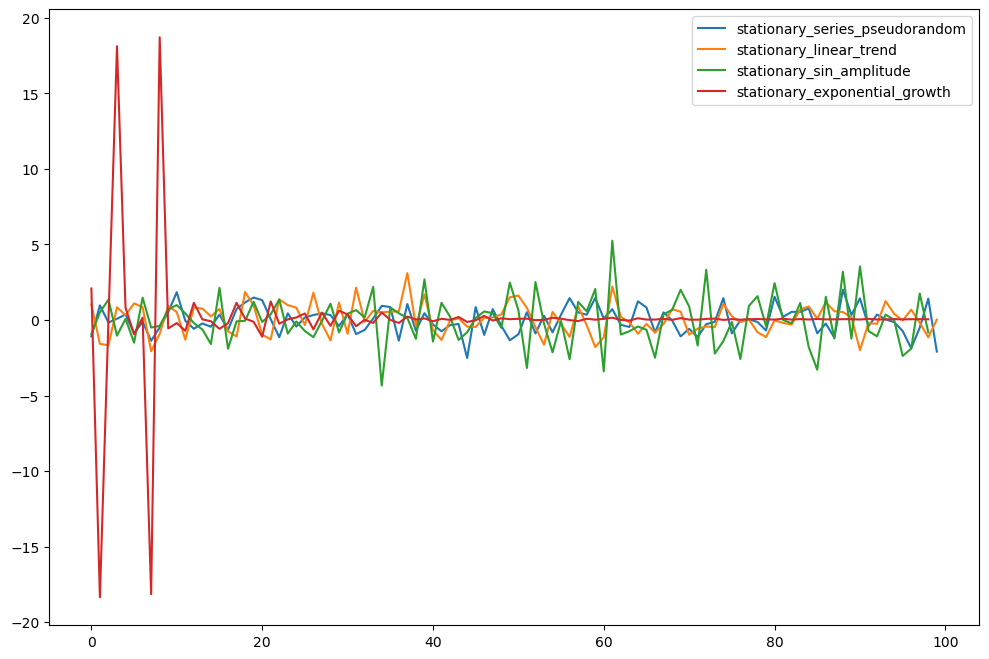

In [27]:
plt.figure(figsize=(12, 8))
plt.plot(stationary_series_pseudorandom, label="stationary_series_pseudorandom")
plt.plot(stationary_linear_trend, label="stationary_linear_trend")
plt.plot(stationary_sin_amplitude, label="stationary_sin_amplitude")
plt.plot(
    stationary_exponential_growth,
    label="stationary_exponential_growth",
)
plt.legend()
plt.show();